In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

/opt/anaconda3/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


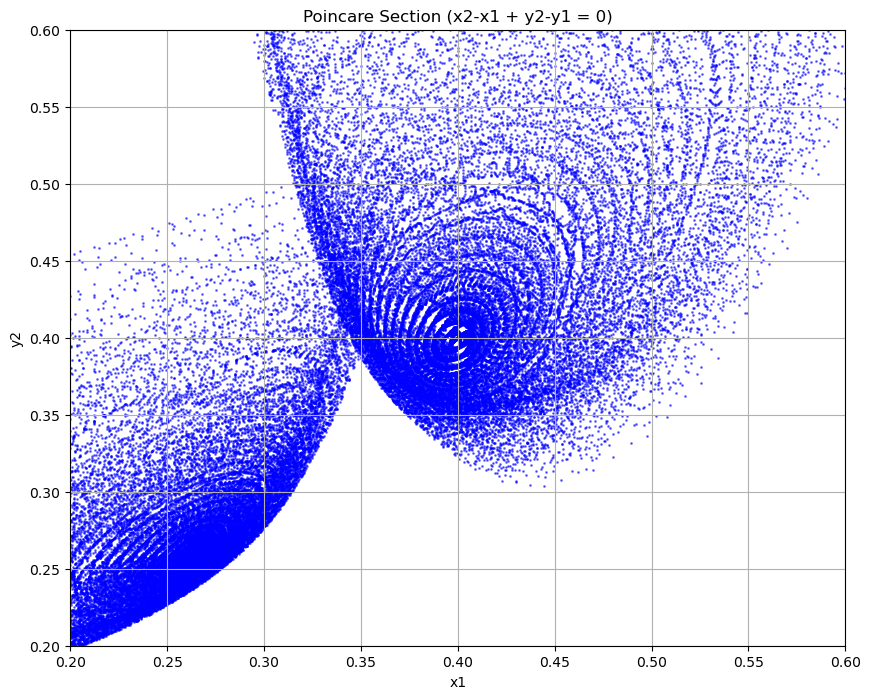

In [2]:
A = np.array([[0, -1, 1], 
              [1, 0, -1], 
              [-1, 1, 0]])

def system(state, t):
    x1, x2, x3, y1, y2, y3 = state
    x = np.array([x1, x2, x3])
    y = np.array([y1, y2, y3])
    
    xTAy = x.dot(A).dot(y)
    
    Ay = A.dot(y)
    Ax = A.dot(x)
    
    dx1 = x1 * (Ay[0] - xTAy)
    dx2 = x2 * (Ay[1] - xTAy)
    dx3 = x3 * (Ay[2] - xTAy)
    dy1 = y1 * (Ax[0] - xTAy)
    dy2 = y2 * (Ax[1] - xTAy)
    dy3 = y3 * (Ax[2] - xTAy)
    
    return [dx1, dx2, dx3, dy1, dy2, dy3]

def section_condition(state):
    x1, x2, _, y1, y2, _ = state
    return x2 - x1 + y2 - y1

t = np.linspace(0, 20000, 10000)

poincare_points = []

for k in range(26):  
    initial_state = [0.5, 0.01*k, 0.5-0.01*k, 0.5, 0.25, 0.25]
    
    # Solve ODE
    solution = odeint(system, initial_state, t)
    
    for i in range(1, len(t)):
        if section_condition(solution[i-1]) * section_condition(solution[i]) < 0:
            alpha = -section_condition(solution[i-1]) / (section_condition(solution[i]) - section_condition(solution[i-1]))
            intersection_point = solution[i-1] + alpha * (solution[i] - solution[i-1])
            poincare_points.append([intersection_point[0], intersection_point[4]])

poincare_points = np.array(poincare_points)

plt.figure(figsize=(10, 8))
plt.scatter(poincare_points[:, 0], poincare_points[:, 1], 
           c='blue', s=1, alpha=0.5)
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('Poincare Section (x2-x1 + y2-y1 = 0)')
plt.grid(True)


plt.xlim(0.2, 0.6)
plt.ylim(0.2, 0.6)

plt.show()